# 비비빅 학습동아리 11회차_스터디
 - 2024.10.29.(화) 18:00~20:30
 - 결정트리 원리, 시각화
 - 랜덤포레스트 원리, OOB(out of bag), 앙상블 -> 배깅,  
 - feature_importance

# 라이브러리 임포트

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm           # 한글 폰트 깨짐방지 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['axes.unicode_minus'] = False     # 폰트 깨짐 방지를 위해 음수 기호 설정


# 결정트리 Decision Tree
1. 데이터 준비하기

In [12]:
# 시각화를 통해 트리모델이 작동하는 방식을 알아봅시다.
a = np.linspace(1,100,50)   # 1~100까지 자연수 생성 (1,100,100)은 너무 촘촘해...
x = a

# noise
noise = np.random.normal(0,5, len(a))
y = a + noise

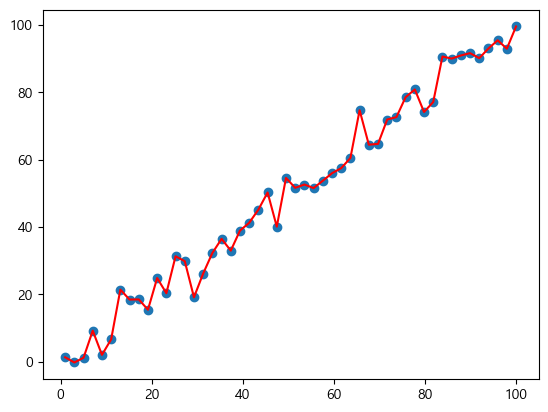

In [13]:
# 데이터의 시각화
plt.scatter(x,y)
plt.plot(x,y, color='red')

2. (비교) 선형회귀 모형

In [14]:
# 선형회귀
from sklearn.linear_model import LinearRegression

In [ ]:
m1 = LinearRegression()
m1.fit(x,y) # 에러가 날겁니다.

##### 행 벡터의 행렬 표현

``` python
# 다음과 같이 생성된 코드는 한 타겟의 features로 취급된다. 
# 하나의 타겟이 50개의 변수를 가지고 있는, 일종의 벡터
a = np.linspace(1,100,50)
```
shape : (50,)
$$
\mathbf{v} = \begin{bmatrix} v_1 & v_2 & v_3 & \cdots & v_n \end{bmatrix}
$$


##### 열 벡터의 행렬 표현

``` python
# rshape(-1,1)로 변환하여 x변수에 대한 50개 타겟의 값으로 인식함
a = np.linspace(1,100,50)
```
shape : (50, 1)
$$
\mathbf{v} = \begin{bmatrix} \begin{bmatrix} v_1    \end{bmatrix} \\
                             \begin{bmatrix} v_2    \end{bmatrix} \\
                             \begin{bmatrix} v_3    \end{bmatrix} \\
                             \begin{bmatrix} \vdots \end{bmatrix} \\
                             \begin{bmatrix} v_n    \end{bmatrix} \end{bmatrix}
$$


In [15]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [16]:
m1 = LinearRegression()
m1.fit(x,y)
y_pred1 = m1.predict(x)

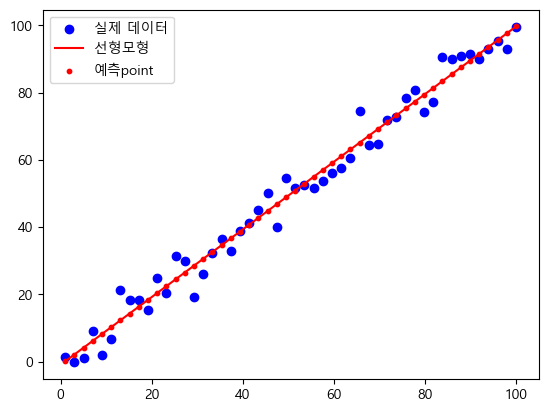

In [17]:
plt.scatter(x, y      , color='blue', label = '실제 데이터')
plt.plot   (x, y_pred1, color='red' , label = '선형모형')
plt.scatter(x, y_pred1, color='red' , label = '예측point', s=10)
plt.legend()

In [18]:
# print(m1.__doc__)
# m1.__dict__

 - 선형모형의 수학적 표현  
$$
\hat{y} = 1.0003  x_0 + 0.4276
$$


2. 결정트리 모델
 - 결정트리는 if문을 작성하는 것으로 이해하면 된다

In [19]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
m2 = DecisionTreeRegressor()
m2.fit(x,y)
y_pred2 = m2.predict(x)

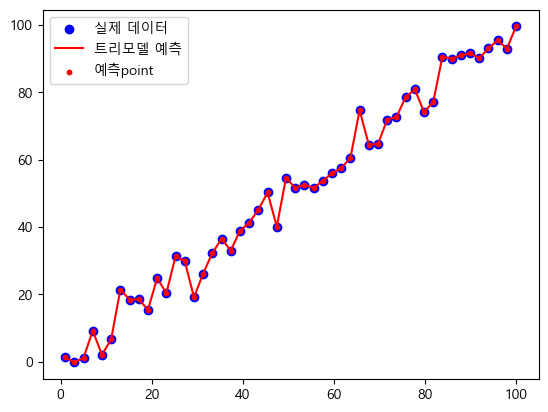

In [21]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred2, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred2, color='red', s=10,  label = '예측point')
plt.legend()
plt.show()

In [22]:
# if문을 몇개나 만든건지 확인해보자.
m2.get_n_leaves(), len(x)

(50, 50)

과적합이 되었다는 사실을 알 수 있음  
 -> 데이터의 작은 변화에도 예측 결과가 크게 변화됨

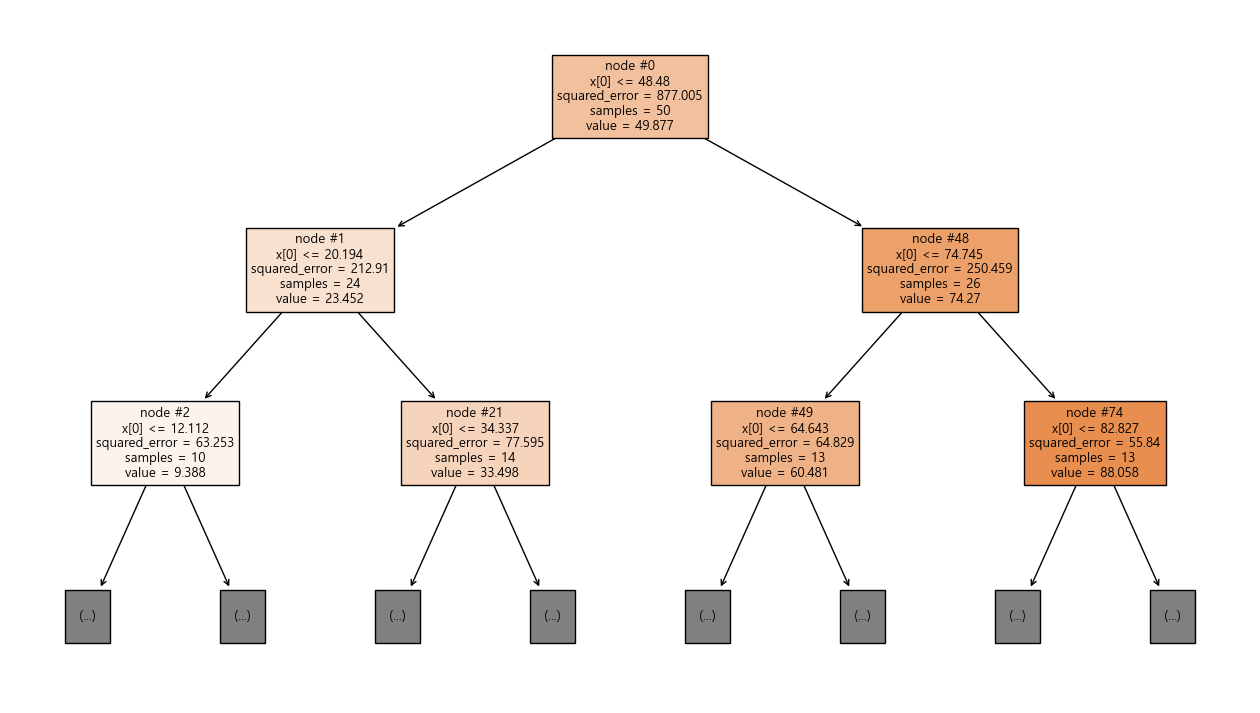

In [25]:
plt.figure(figsize=(16,9))
plot_tree(m2, max_depth=2, filled=True, impurity=True, node_ids=True)
plt.show()

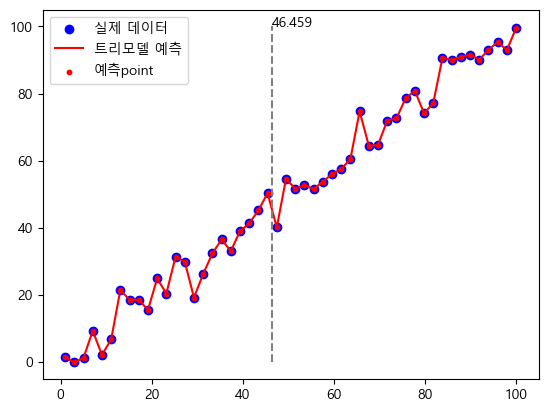

In [23]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred2, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred2, color='red', s=10,  label = '예측point')
# 노드의 분류기준을 표시
plt.vlines(x=46.459, ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=46.459, s='46.459')
plt#
plt.legend()

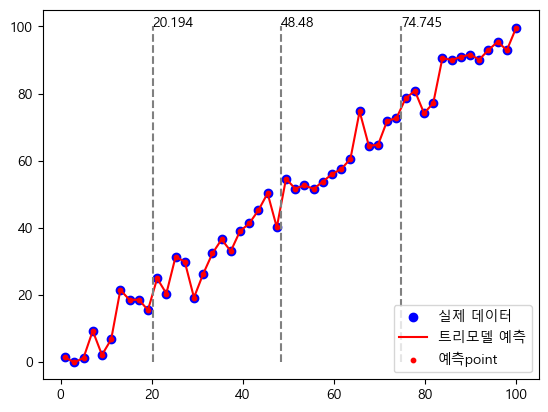

반씩 자르는것 같음...


In [27]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred2, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred2, color='red', s=10,  label = '예측point')
# 노드의 분류기준을 표시
#0번 노드 
plt.vlines(x=m2.tree_.threshold[0], ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=m2.tree_.threshold[0], s=m2.tree_.threshold[0].round(3))
#1번 노드
plt.vlines(x=m2.tree_.threshold[1], ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=m2.tree_.threshold[1], s=m2.tree_.threshold[1].round(3))
#54번 노드
plt.vlines(x=m2.tree_.threshold[48], ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=m2.tree_.threshold[48], s=m2.tree_.threshold[48].round(3))
plt#
plt.legend( loc="lower right") # , bbox_to_anchor=(1, 0.3) -> 위치를 좀 더 세부적으로 조정가능
plt.show()
print('반씩 자르는것 같음...')

In [28]:
# 맥스 뎁스를 제한해보자.
m3 = DecisionTreeRegressor(max_depth=2)
m3.fit(x,y)
y_pred3 = m3.predict(x)

예측결과는 계단 형태로 이루어집니다.


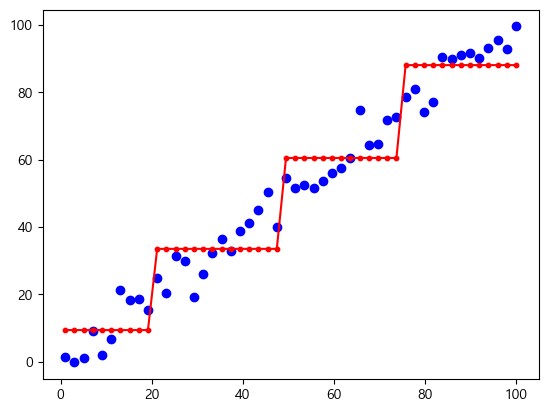

In [29]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')
plt.plot(x, y_pred3, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred3, color='red', s=10,  label = '예측point')
print('예측결과는 계단 형태로 이루어집니다.')

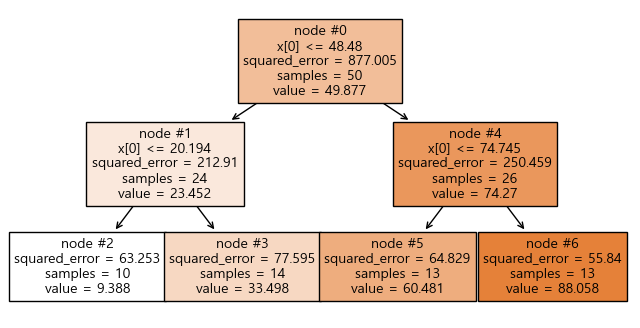

In [30]:
plt.figure(figsize=(8,4))
plot_tree(m3, filled=True, impurity=True, node_ids=True, fontsize=10 )
plt.show()

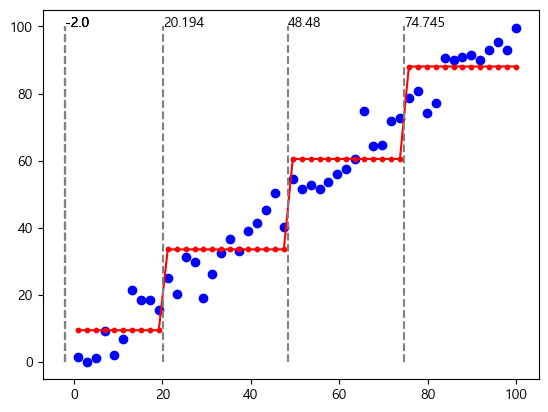

In [33]:
plt.scatter(x, y, color='blue',  label = '실제 데이터')

plt.plot(x, y_pred3, color='red', label = '트리모델 예측')
plt.scatter(x, y_pred3, color='red', s=10,  label = '예측point')

# 노드의 분류기준을 표시
for leaf in m3.tree_.threshold:
    plt.vlines(x=leaf, ymin=0, ymax=100, colors='gray', linestyles='--')
    plt.text(y=100, x=leaf, s=leaf.round(3))

#plt.legend()
plt.show()

In [34]:
m3.tree_.threshold # -2는 자식 노드임을 의미

array([48.47959137, 20.19387817, -2.        , -2.        , 74.74489975,
       -2.        , -2.        ])

3. 훈련 데이터셋으로 경험하지 못한 영역에 대한 예측
 - 재학습이 왜 필요한가?
 - 트리모형 결과 해석의 유의점

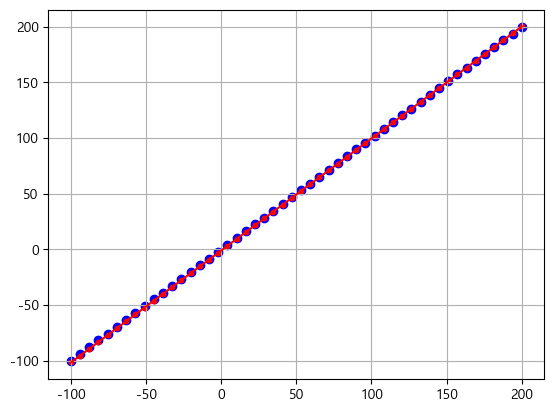

In [35]:
# 만약에 x가 0~100 이 아닌 -100~200 사이의 값이라면?
x2 = np.linspace(-100,200,50).reshape(-1,1)
y2 = x2

y2_pred1 = m1.predict(x2) #선형모형의 

plt.scatter(x2, y2, color='blue',  label = '실제 데이터')
plt.plot(x2, y2_pred1, color='red', label = '트리모델 예측')
plt.scatter(x2, y2_pred1, color='red', s=10,  label = '예측point')
plt.grid()
# 선형모형의 경우 학습 데이터 바깥은 오차가 점점 커지나
# 그래도 어느정도 예측력이 유지됨

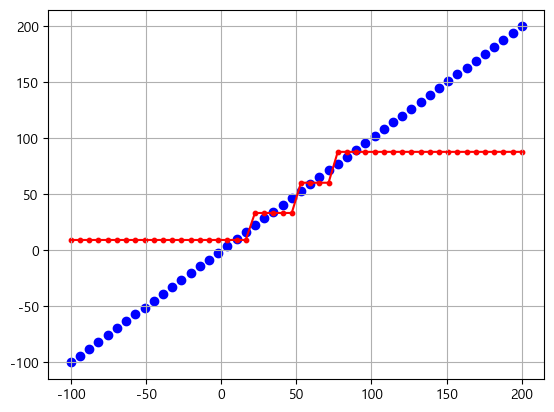

In [36]:
y2_pred2 = m3.predict(x2)

plt.scatter(x2, y2,       color='blue', label = '실제 데이터')
plt.plot   (x2, y2_pred2, color='red',  label = '트리모델 예측')
plt.scatter(x2, y2_pred2, color='red',  label = '예측point', s=10)
plt.grid()
# 결정트리는 완전히 망가져버림

# 랜덤포레스트(RandomForest)
 - 테이블 형태의 데이터 분류, 예측에 가장 좋다고 알려짐(딥러닝 제외)
 - 특징
    - 앙상블: 결정트리 여러 개를 만든다. -> 각 트리로 투표.
    - 데이터(sample)와 특성(feature)를 랜덤 선택 -  OOB(Out of Bag)
      * 특성 선택에 대한 부분은 오늘 다룰 수는 없음
      * 특성 중요도 개별 선택 트리의 불순도 감소 수준의 평균수치로 산출됨 
      * 특성 중요도는 모델 훈련 시마다 바뀔 수 있음  
           -> 다중회귀모형에서의  회귀계수와는 조금 다른 개념
           $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon $$

In [59]:
from sklearn.ensemble import RandomForestRegressor
m4 = RandomForestRegressor(
    n_estimators=2,
    max_depth=2,
    bootstrap=True)

m4.fit(x,y.ravel())  ##랜포는 1차원 행렬 데이터를 요구 ravel()로 다시 돌려놓자.
y_pred4 = m4.predict(x)

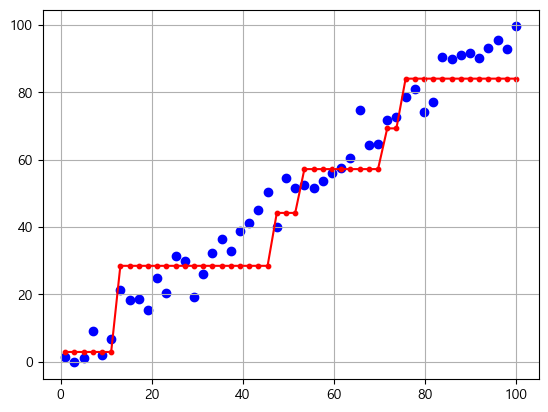

In [60]:
plt.scatter(x, y,       color='blue', label = '실제 데이터')
plt.plot   (x, y_pred4, color='red',  label = '트리모델 예측')
plt.scatter(x, y_pred4, color='red',  label = '예측point', s=10)
plt.grid()

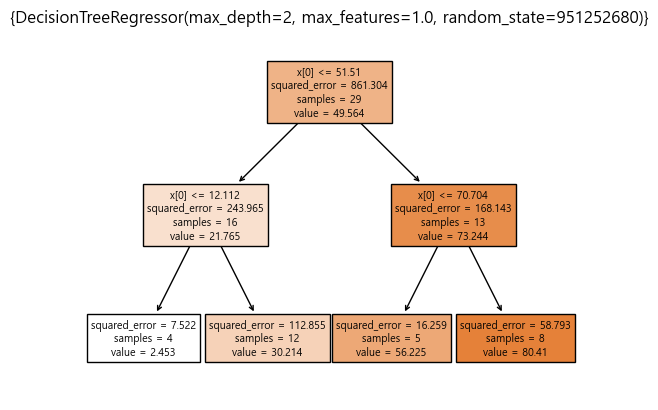

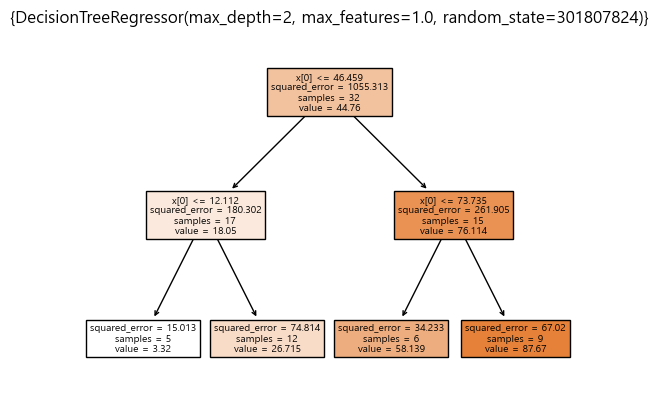

In [61]:
# m4.estimators_ 로 각 결정트리를 확인 가능
for i in m4.estimators_:
    plot_tree(i, filled=True)
    plt.title({i})
    plt.show()

### 부트스트랩 샘플링,  OOB out of bag


 - 부트스트랩 샘플링. 모집단에 대해 모집단 갯수만큼 복원추출하는 방법
 - 따라서 한 데이터 포인트가 여러 번 선택될 수도 있고, 선택되지 않을 수도 있습니다.
 - 부트스트랩 샘플링을 여러 번 반복하면, 각 샘플에 따라 조금씩 다른 데이터셋을 만들 수 있습니다.
* 특정 데이터 포인트가 선택되지 않을 확률
$$
\left(1 - \frac{1}{N}\right)^N $$
* N이 충분히 큰 경우 근사값
$$
\left(1 - \frac{1}{N}\right)^N \approx \frac{1}{e} \approx 0.368 
$$
* 샘플로 선정되는 비율
$$
1 - \frac{1}{e} \approx 0.632
$$

### 부트스트랩 샘플링 시각화

In [88]:
n_samples = len(x)
random_state = np.random.RandomState(m4.estimators_[1].random_state)
sample_list = random_state.choice(n_samples, n_samples, replace=True)

In [89]:
sample_list, len(set(sample_list)) # 이 예시에서 1은 4회 추출됨.

(array([17,  2, 35, 31, 29, 26, 38, 49, 20, 29, 47, 13,  1, 31,  9, 11, 46,
         5, 14, 49, 16,  0, 42, 40, 11,  1, 47, 25, 41,  5, 37, 20,  1,  3,
        10,  3, 43, 11, 19, 31, 15,  9, 38, 16, 40,  1, 37, 28,  8,  6]),
 32)

In [90]:
sample_x = x[sample_list]
sample_y = y[sample_list]

In [91]:
len(np.unique(sample_x)), len(np.unique(sample_y))

(32, 32)

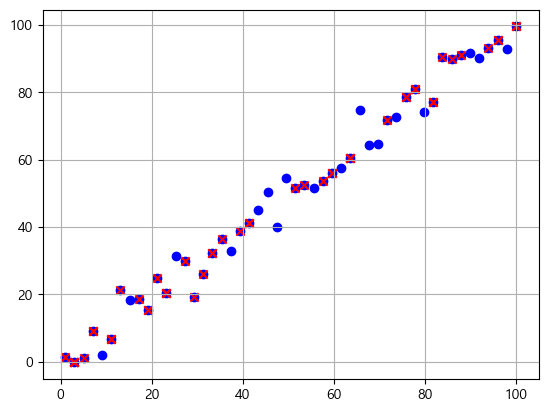

In [96]:
plt.scatter(x,               y, color='blue')
plt.scatter(sample_x, sample_y, color='red',  marker='x')
plt.grid()